In [80]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# load the model
model=VGG16()

# restructure the model
model=Model(inputs=model.inputs,outputs=model.layers[-2].output)

#summary
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 979s 2us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [71]:
train_dir=r"C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train"
image_files=[]
for dir in os.listdir(train_dir):
    dir=os.path.join(train_dir,dir)
    print(dir)
    image_files+=[os.path.join(dir,path) for path in os.listdir(dir)]
    
    

C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\long-pants
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\long-pants_multiple
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\long-sleeve
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\long-sleeve_multiple
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\short-pants
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\short-pants_multiple
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\short-sleeve
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\short-sleeve_multiple
C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\sleeveless
C:\Users\admin\Desktop\dress recognition\clothes-dataset

In [72]:
print(len(image_files))

344


In [102]:
features={}
for path in image_files:
    img=load_img(path,target_size=(224,224))
    # convert to numpy array
    img=img_to_array(img)
    # reshape to input size
    img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    #extract features
    feature=model.predict(img)
    features[path]=feature.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [154]:
# get features of target image
ref_image_path=r"C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\test\short-sleeve\images (5).jpeg"
img=load_img(ref_image_path,target_size=(224,224))
# convert to numpy array
img=img_to_array(img)
# reshape to input size
img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
#extract features
ref_feature=model.predict(img)
ref_feature=ref_feature.flatten()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


In [155]:
ref_feature.shape

(4096,)

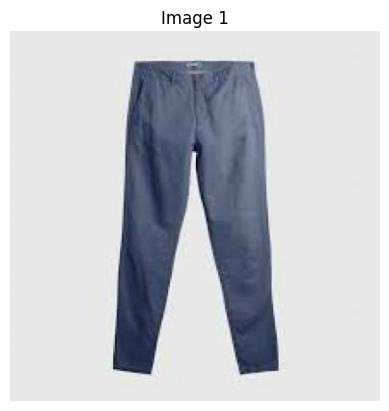

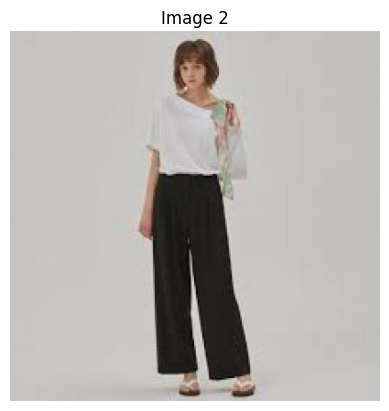

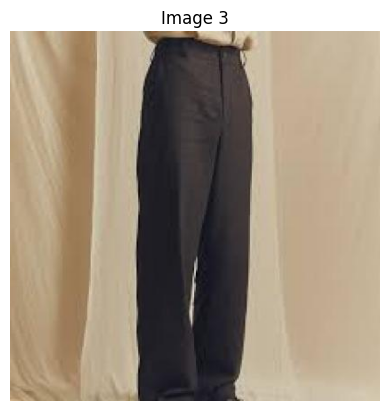

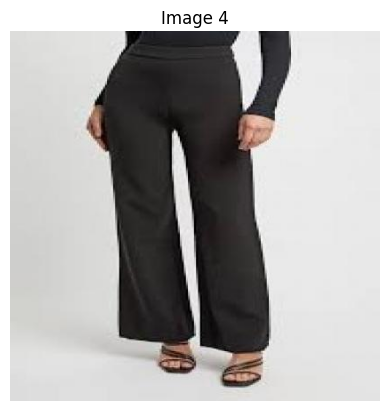

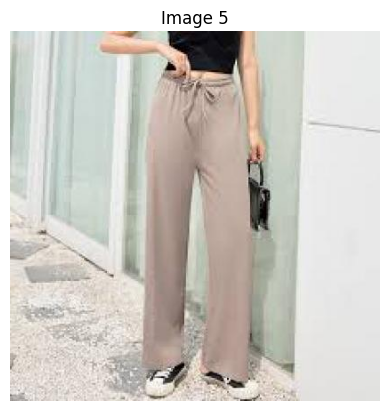

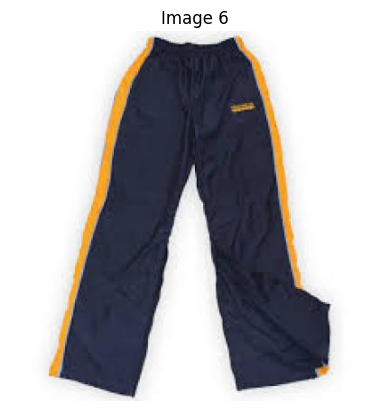

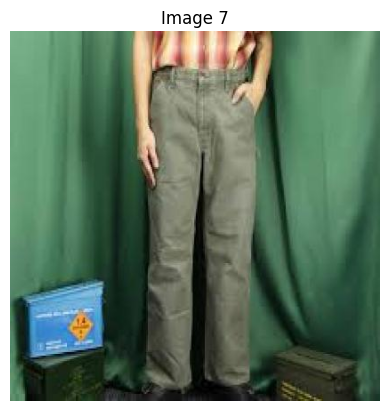

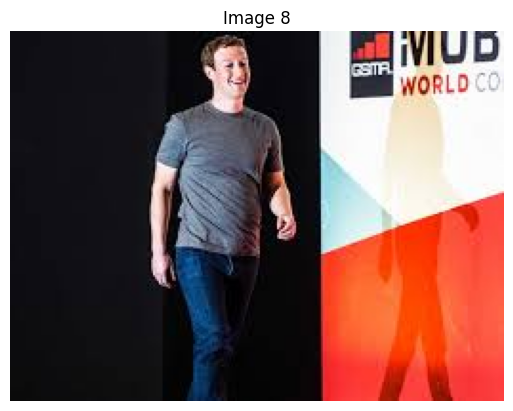

The image most similar to the reference vector is: None


In [156]:
import numpy as np
from scipy.spatial.distance import cosine

# Find the image with the most similar feature vector
most_similar_image_path = None
min_cosine_distance = float('inf')
sim_images=[]
i=0
for path, vector in features.items():
    distance = cosine(ref_feature, vector)
    if distance < min_cosine_distance:
        min_cosine_distance = distance
        sim_images.append(path)
        plt.figure()
        plt.imshow(Image.open(path))
        plt.title(f"Image {i+1}")
        plt.axis('off')  # Turn off the axis    
        plt.show()
        i+=1

print(f"The image most similar to the reference vector is: {most_similar_image_path}")

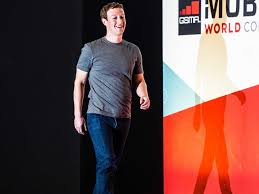

In [157]:
Image.open(sim_images[-1])


In [158]:
# using l2 norm
# Find the image with the most similar feature vector based on L2 distance
most_similar_image_path = None
min_l2_distance = float('inf')

for path, vector in features.items():
    distance = np.linalg.norm(ref_feature- vector)  # L2 distance
    if distance < min_l2_distance:
        min_l2_distance = distance
        most_similar_image_path = path


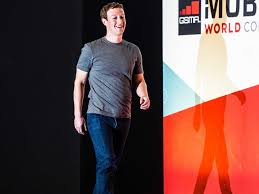

In [159]:
Image.open(most_similar_image_path)

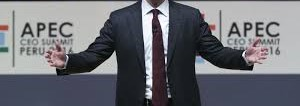

In [160]:
Image.open(ref_image_path)